In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
class Nbody():
    #class vairables
    D = 2
    N = 60
    m = 100
    k = 500
    side = 100
    init_side = 10
    init_avg_speed = 0
    total_time = 500
    h = 0.1 #time_step
    objects = []
    K_data = []
    E_data = []
    xData = []
    yData = []
    #todo everybody data

    def __init__(self):
        self.data = []
        self.r = Nbody.init_side * np.random.uniform(size=Nbody.D)  
        self.v = Nbody.init_avg_speed * np.random.uniform(size=Nbody.D) 
        Nbody.objects.append(self)
        
    def kin():
        retval = Nbody.m*sum((np.inner(Nbody.obj(i).v,Nbody.obj(i).v))/2 for i in range(1,Nbody.N+1) )
        return retval

    def E():
        U = 0
        for i in range(1,Nbody.N+1):
            for j in range(1,Nbody.N+1):
                if(i!=j):
                    U +=Nbody.k* np.log(np.linalg.norm(Nbody.obj(i).r-Nbody.obj(j).r))
        return U/2 + Nbody.K_data[len(Nbody.K_data)-1]
    def obj(i):
        return Nbody.objects[i-1]
    
    def next(): 
        for i in range(1,Nbody.N+1):
            obj = Nbody.obj(i)
            obj.data.append(obj.r)
            a1 = Nbody.get_a(i)
            obj.r += obj.v*Nbody.h + a1*0.5*Nbody.h**2
            obj.wall()
            a2 = Nbody.get_a(i)
            obj.v += 0.5*(a1+a2)
            #obj.wall()
                    
    def generator():
        fig = plt.figure() 
        axis = plt.axes(xlim =(0, 100), ylim =(0, 100)) 
        for i in range(int(Nbody.total_time/Nbody.h)):
            Nbody.K_data.append(Nbody.kin())
            #Nbody.E_data.append(Nbody.E())
            Nbody.xData.append(Nbody.obj(1).r[0])
            Nbody.yData.append(Nbody.obj(1).r[1])
            Nbody.next()
            #if i%100==0 :
            #    Nbody.plot_pos(i)
            #    plt.clf()
            
    def create():
        for i in range(1,Nbody.N+1):
            program = f"O_{i}=Nbody()"
            exec(program)
            
    def wall(self):
      for i in range(Nbody.D):
        while((self.r[i]>=Nbody.side) or (self.r[i]<=0)):
            if (self.r[i]>=Nbody.side):
              self.v[i] *= -1
              self.r[i] = 2*Nbody.side - self.r[i]
            elif self.r[i]<=0:
              self.v[i] *= -1
              self.r[i] *= -1

        
    def dist(i,j):
      return Nbody.obj(i).r -Nbody.obj(j).r

    def get_a(i):
        c = np.array((0.0,0.0))
        for j in range(1,i):
            d= Nbody.dist(i,j)
            c += d/np.inner(d,d)
            
        for j in range(i+1,Nbody.N+1):
            d= Nbody.dist(i,j)
            c += d/np.inner(d,d)
            
        a = -Nbody.k*0.5*c/Nbody.m
        return a

    def animate():
      return 0


    def plot_pos(i):
        for j in range(1,Nbody.N):
            plt.scatter(Nbody.obj(j).r[0],Nbody.obj(j).r[1])
            
        plt.savefig(str(i)+".jpg")
        
    def plot_K():  
      plt.plot(range(int(Nbody.total_time/Nbody.h)),Nbody.K_data)  

    def plot_E():
      plt.plot(range(int(Nbody.total_time/Nbody.h)),Nbody.E_data)  
    
    def plot_U():
      plt.plot(range(int(Nbody.total_time/Nbody.h)),Nbody.U_data)  

        

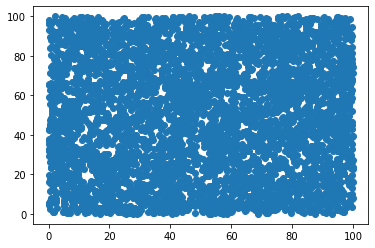

In [160]:
plt.scatter(Nbody.xData,Nbody.yData)

In [157]:
Nbody.create()

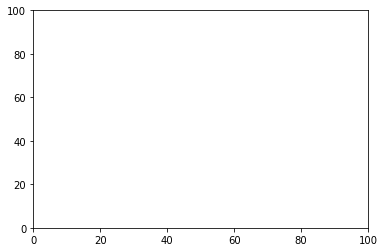

In [158]:
Nbody.generator()

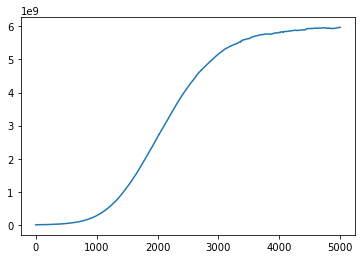

In [159]:
Nbody.plot_K()

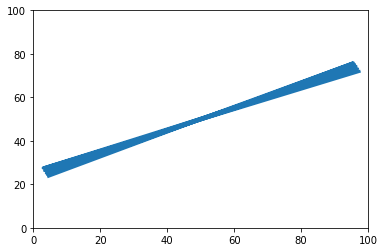

In [162]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 100), 
                ylim =(0, 100)) 
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,
   
def animate(i):
    #plt.plot(Nbody.xData[2*i],Nbody.yData[2*i],c="red")
    if i<10 :
            x = Nbody.xData[0:i]
            y = Nbody.yData[0:i]
    else:
            x = Nbody.xData[i-10:i]
            y = Nbody.yData[i-10:i]
        
        

    line.set_data(x, y)
      
    return line,
   
anim = FuncAnimation(fig, animate, init_func = init,
                     frames = 5000, interval = 1, blit = True)
  
   
anim.save('slow.mp4', 
          writer = 'ffmpeg', fps = 30)

ma + mb